In [1]:
import os
import numpy as np
import scipy.io as scpio
import mne
import pandas as pd
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.io import wavfile
import glob
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)

#os.environ['ETS_TOOLKIT'] = 'qt4'
#os.environ['QT_API'] = 'pyqt5'



In [2]:
subj_id = 14
# Set the analysis directory where all plots will be saved
#analysis_dir = '/mnt/beegfs/workspace/2021-0292-NeuroFlex/prj_neuroflex/k1_analyses'
plots_dir = f'../../datasets/plots/subj_{subj_id}/'
meg_dir = f'../../datasets/data/subj_{subj_id}/meg/'



In [3]:

block = 9


meg_block_name = f'block_{block}_meg.fif'
raw = mne.io.read_raw_fif(os.path.join(meg_dir, meg_block_name))
raw_init = raw.copy()


Opening raw data file ../../datasets/data/subj_14/meg/block_9_meg.fif...
    Read 5 compensation matrices
    Range : 0 ... 224459 =      0.000 ...   748.197 secs
Ready.
Current compensation grade : 3


Removing 5 compensators from info because not all compensation channels were picked.
Setting 59486 of 224460 (26.50%) samples to NaN, retaining 164974 (73.50%) samples.
Effective window size : 0.853 (s)


/Users/keyvan.mahjoory/opt/anaconda3/envs/mne/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


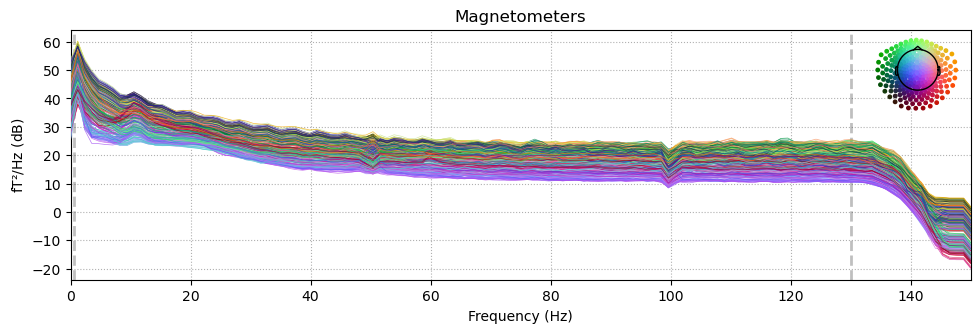

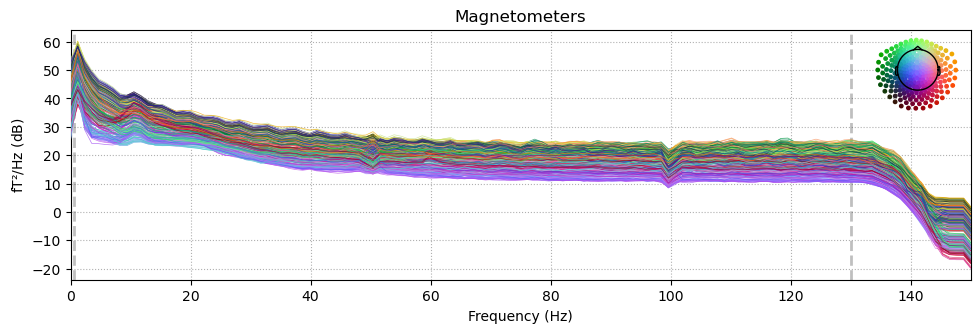

In [4]:
raw.compute_psd().plot()
#raw.plot_psd(fmax=160)

In [5]:
## Bad trials rejection

#raw.plot_psd(fmax=40, n_fft=int(raw.info['sfreq']*2), n_overlap=int(raw.info['sfreq']))
%matplotlib qt
raw.plot(duration=30, n_channels=60)
#fig.canvas.key_press_event('a')



Using qt as 2D backend.
Using pyopengl with version 3.1.6


Channels marked as bad:
none


In [ ]:

raw.plot_psd()
#raw.plot_psd(fmax=160)



In [6]:

### Save channel/time span rejected data and its PSD plot
# #############################################################################
if 1:
    fig1 = raw.plot_psd(fmax=150)
    os.makedirs(os.path.join(plots_dir, 'psd_filtered_downsampled'), exist_ok=True)
    fig1.savefig(os.path.join(plots_dir, 'psd_filtered_downsampled', f'psd_block_{block}_tsrej.jpg'))
    plt.close('all')


    write_name = f"block_{block}" + "_meg_tsrej.fif"  
    raw.save(os.path.join(meg_dir, write_name), overwrite=True)








NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Removing 5 compensators from info because not all compensation channels were picked.
Setting 65181 of 224460 (29.04%) samples to NaN, retaining 159279 (70.96%) samples.
Effective window size : 6.827 (s)
Writing /Users/keyvan.mahjoory/k1_analyses/prj_neuroflex/neuroflex_analysis/notebooks/preprocessing/../../datasets/data/subj_14/meg/block_9_meg_tsrej.fif


/var/folders/cn/42yytr0j3dl9t4k24ldqk59h0000gq/T/ipykernel_6304/2647850983.py:11: RuntimeWarning: This filename (/Users/keyvan.mahjoory/k1_analyses/prj_neuroflex/neuroflex_analysis/notebooks/preprocessing/../../datasets/data/subj_14/meg/block_9_meg_tsrej.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(os.path.join(meg_dir, write_name), overwrite=True)


Closing /Users/keyvan.mahjoory/k1_analyses/prj_neuroflex/neuroflex_analysis/notebooks/preprocessing/../../datasets/data/subj_14/meg/block_9_meg_tsrej.fif
[done]
